In [1]:
from elasticsearch import Elasticsearch
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

es = Elasticsearch (
        ['https://127.0.0.1:9200'],
        verify_certs= False,
        basic_auth=('elastic', 'elastic'),
        ssl_show_warn=False,
        request_timeout=1000)   

In [2]:
# Query parameters, which need to be defined according to your specific needs
# query = {
#     "query": {
#         "match_all": {}
#     }
# }

query = {
    "query": {
        "query_string": {
            "fields": ["content"],
            # "query": "\"AI\""
            "query": "\"crime\""
        }
    }
}

# query = {
#     "query": {
#         "range": {
#             # "sentiment.compound": {
#             "readability_grades.FleschReadingEase": {
#                 # "lt": 90
#                 "gt": 90
#             }
#         }
#     }
# }

# Get data from Elasticsearch
# response = es.search(index="mastodon-en", body=query, size=5000)
response = es.search(index="twitter-en-geo", body=query, size=10000) 

print(response)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23672\3058326587.py:32: DeprecationWarning: Received 'size' via a specific parameter in the presence of a 'body' parameter, which is deprecated and will be removed in a future version. Instead, use only 'body' or only specific parameters.
  response = es.search(index="twitter-en-geo", body=query, size=10000)
IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



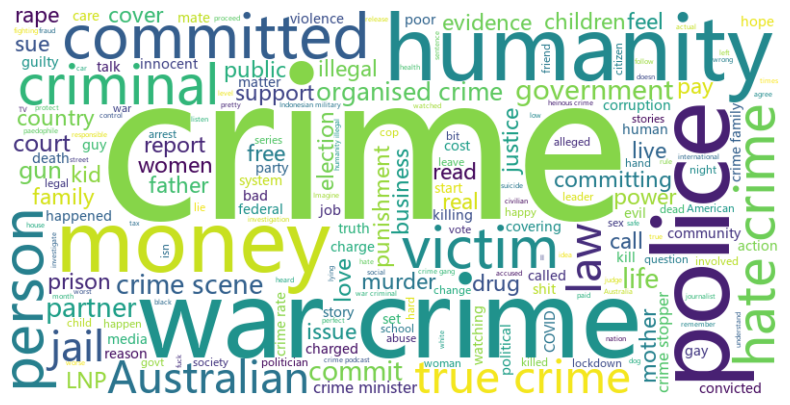

In [3]:
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from matplotlib.animation import FuncAnimation
import imageio
import threading

# Read the stop word file
def load_stopwords(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        stopwords = set([line.strip() for line in file])
    return stopwords

# Set the stop word file path
stopwords_path = 'stopwords.txt' 

# Load stop word
stopwords = load_stopwords(stopwords_path)
# stopwords = set(stopwords.words('english'))
# stopwords = set(STOPWORDS)

# Extract the required text data
text_data = " ".join([doc['_source']['content'] for doc in response['hits']['hits']])


# Generate a word cloud using the obtained text
wordcloud = WordCloud(background_color="white", stopwords=stopwords, font_path="msyh.ttc", width=800,  height=400).generate(text_data)
# wordcloud = WordCloud(background_color="white",  font_path="msyh.ttc", width=800,  height=400).generate(text_data)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()